# Demo: Identifying Patterned Relationships and Correlation

In [5]:
%config Completer.use_jedi = False
# Initial imports
import numpy as np
import pandas as pd
import hvplot.pandas
from path import Path


## Loading Time Series Data Into a DataFrame

In [6]:
# Set the file path
file_path = Path("../Resources/national-home-sales.csv")

In [7]:
# Load time series data into Pandas
df_home_sales = pd.read_csv(
    file_path,
    index_col="period_end_date",
    parse_dates=True
)

In [11]:
# Display sample data
df_home_sales.head(10)
df_home_sales.count()

inventory            103
homes_sold           103
median_sale_price    103
dtype: int64

In [23]:
# Sort the DataFrame index in ascending order
df_home_sales = df_home_sales.sort_index()

# Display sample data
df_home_sales.head(10)



,inventory,homes_sold,median_sale_price
period_end_date,,,
2012-02-01,2078931,304737,160000
2012-03-01,2120173,394034,171000
2012-04-01,2155803,404927,178000
2012-05-01,2163303,464281,186000
2012-06-01,2145658,487959,194000
2012-07-01,2109202,451243,192000
2012-08-01,2048712,485480,190000
2012-09-01,2010080,392397,187000
2012-10-01,1936114,423079,185000


## Identifying Seasonal Patterns

<Axes: xlabel='period_end_date'>

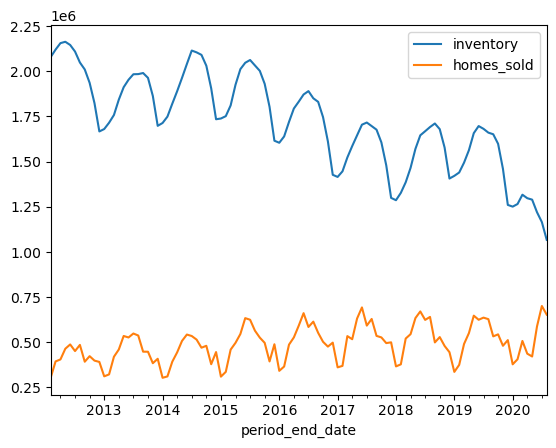

In [14]:
# Plot the inventory and homes_sold series
df_home_sales[['inventory','homes_sold']].plot()

## Analyzing Data Correlations

In [15]:
# Compute the correlation between "inventory" and "homes_sold"
df_home_sales[['inventory','homes_sold']].corr()

,inventory,homes_sold
inventory,1.000000,-0.006937
homes_sold,-0.006937,1.000000


In [24]:
d1 = df_home_sales['inventory']
d2 = df_home_sales['homes_sold'].shift(3)

print(d2)
# d1.corr(d2)



period_end_date
2012-02-01         NaN
2012-03-01    304737.0
2012-04-01    394034.0
2012-05-01    404927.0
2012-06-01    464281.0
                ...   
2020-04-01    507324.0
2020-05-01    436855.0
2020-06-01    421351.0
2020-07-01    587635.0
2020-08-01    700733.0
Name: homes_sold, Length: 103, dtype: float64


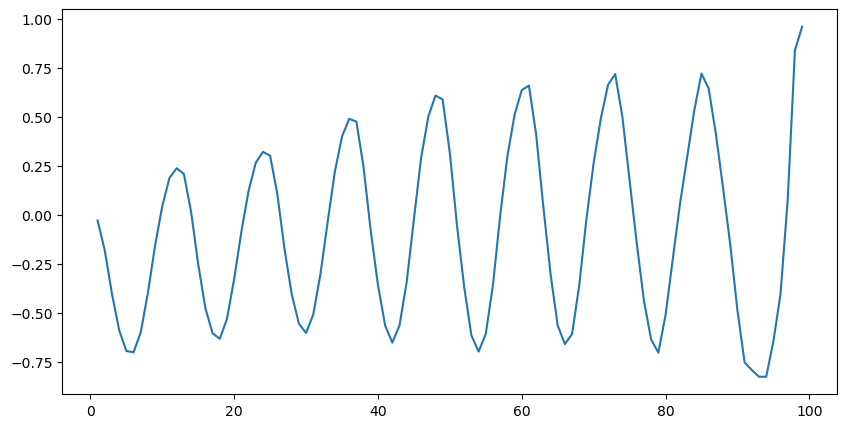

In [29]:
import matplotlib.pyplot as plt

def crosscorr(d1, d2, lag=0):
    return d1.corr(d2.shift(lag))

d1 = df_home_sales['homes_sold']
d2 = df_home_sales['inventory']
lags = range(1,100)

cc = [crosscorr(d1,d2,lag) for lag in lags]

# print(cc)
plt.figure(figsize = (10,5))
plt.plot(lags,cc)
plt.show()
           
           



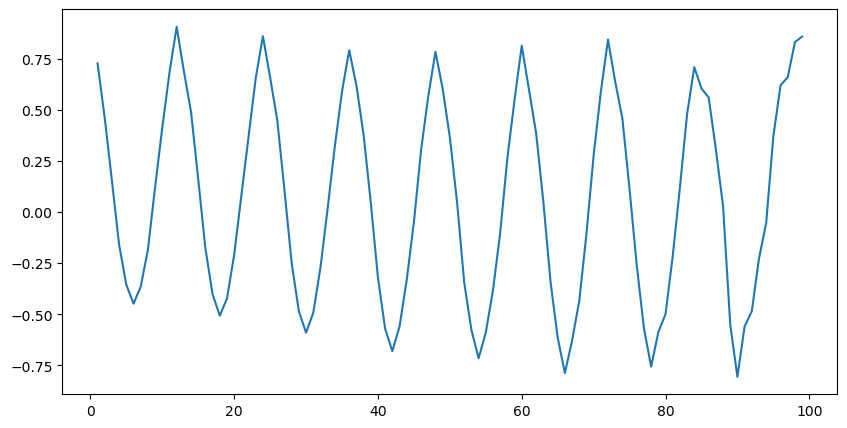

In [30]:
def autocorr(d1, lag=0):
    return d1.corr(d1.shift(lag))

d1 = df_home_sales['homes_sold']
# d2 = df_home_sales['inventory']
lags = range(1,100)

ac = [autocorr(d1,lag) for lag in lags]

# print(cc)
plt.figure(figsize = (10,5))
plt.plot(lags,ac)
plt.show()
           
           

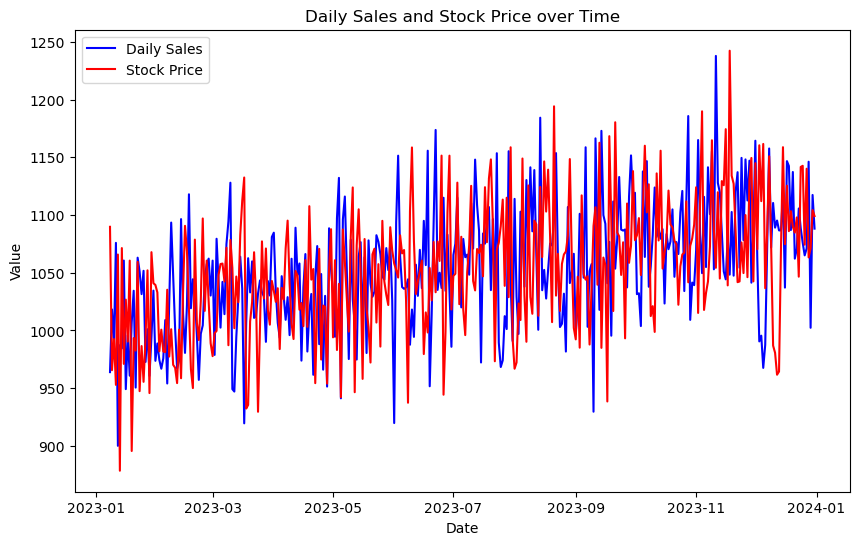

[0.29816979420593015, 0.1998826509778872, 0.2270935505340475, 0.19323090731516634, 0.24668172424297136, 0.2274536984750324, 0.9835492587679613, 0.23859310290553126, 0.23384347271535635]


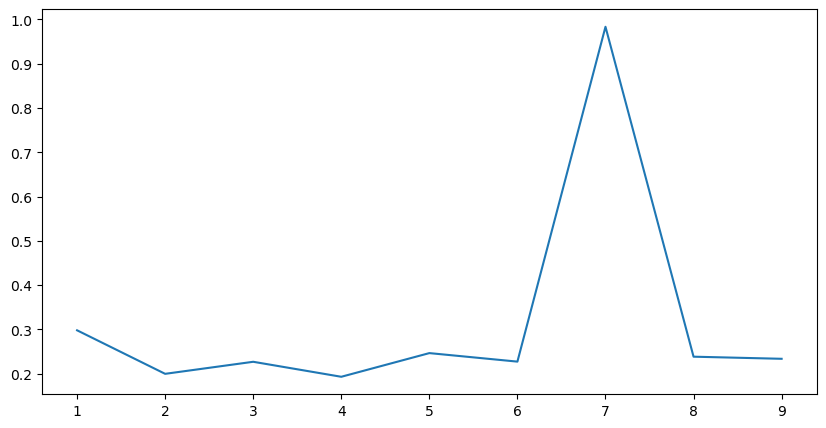

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
date_range = pd.date_range(start='1/1/2023', periods=365)

trend = pd.Series(np.linspace(1000, 1100, len(date_range)), index=date_range)

daily_sales = trend + np.random.normal(0, 50, len(date_range))

stock_price = pd.Series(daily_sales.shift(7) + np.random.normal(0, 10, len(date_range)), index=date_range)

data = pd.DataFrame({'daily_sales': daily_sales, 'stock_price': stock_price})

data = data.dropna()

plt.figure(figsize=(10, 6))
plt.plot(data['daily_sales'], label='Daily Sales', color='blue')
plt.plot(data['stock_price'], label='Stock Price', color='red')
plt.title('Daily Sales and Stock Price over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# cross corelation

def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

d1 = data['daily_sales']
d2 = data['stock_price']

lags = range(1,10)
cc = [crosscorr(d2,d1, lag) for lag in lags]
print(cc)
plt.figure(figsize=(10, 5))
plt.plot(lags, cc)
plt.show()